LAB 2: Mine Crafting
Ruben Dasgupta 
PHYS265

In [1]:
#Constants
Gnewt = 6.6743E-11 #
g = 9.81 #m/s^2
massearth = 5.972E24#kg
massmoon = 7.35E22#kg
radiusearth = 6378.1*1e3# m
radiusmoon = 1738.1*1e3# m
earthrotrate = 7.272E-5 #rad/s
alpha = 0
gamma=2

In [2]:
#imports
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, quad

Fall time to bottom of mineshaft (analytical integration): 28.55686245854129 seconds.
Fall time to bottom of mine shaft (numerical integration by solve_ivp): 28.556862458541282 seconds.
The difference between the analytical and numerical integration is 7.105427357601002e-15
This results in a percent error of 2.4881680779590636e-14%

This difference and percent error is so small the actual error value is only 3 times larger machine epsilon. Machine epsilon is the smallest 
difference python will process between two numbers.This small deviation makes no practical difference in calculations for the mineshaft. 
This verifies that solve_ivp is a fine method to do further computation of similar questions.

As another note I have plotted the y axis as the Earth's actual radius but in kilometers, because it makes the reference frame clearer than
if I were to plot it from 4km to 0. 


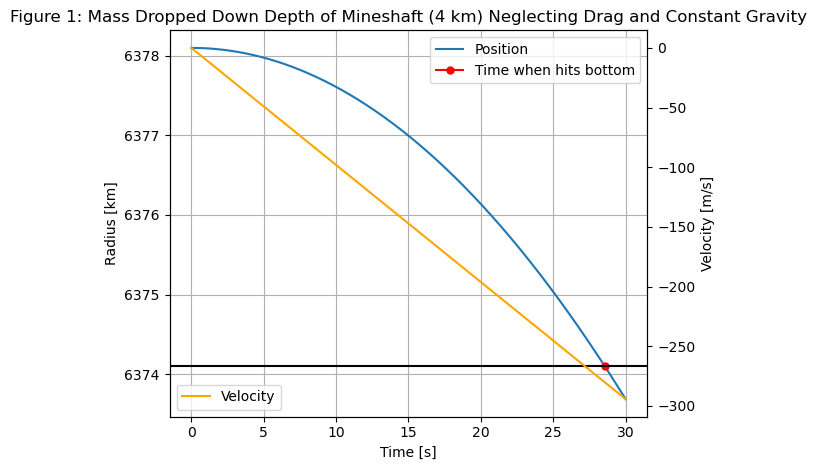

In [3]:
#Part 1
analytic = (np.sqrt(-8*1000/-g))
print(f"Fall time to bottom of mineshaft (analytical integration): {analytic} seconds.")
def derivatives (t,s): #EOM
    y,v = s
    dydt = v
    dvdt = -g+alpha*np.abs(v)**gamma
    return [dydt, dvdt]

def hitsbottom(t,s): #event
    return s[0]-(radiusearth-4000)

hitsbottom.terminal = False
hitsbottom.direction = -1

t0,tf = 0,30
t_eval = np.linspace(t0,tf,1000)
soln = solve_ivp(fun = derivatives,t_span = (t0,tf),y0 = [radiusearth,0],t_eval = t_eval, events = hitsbottom )
t = soln.t
print(f"Fall time to bottom of mine shaft (numerical integration by solve_ivp): {soln.t_events[0][0]} seconds.")
y = soln.y[0]
v = soln.y[1]
#plots
fig,ax = plt.subplots()
ax.plot(t,y*1e-3,label = "Position")
ax.set_ylabel("Radius [km]")
ax.set_xlabel("Time [s]")
ax.plot(soln.t_events[0][0],soln.y_events[0][0][0]*1e-3, marker = "o",markersize = 5, color = "red", label = "Time when hits bottom")
ax.axhline(y=radiusearth*1e-3-4, color = "black")
numerical = soln.t_events[0][0] 
#twin ax plot
twin = ax.twinx()
twin.plot(t,v, label = "Velocity", color = "orange")
twin.legend(loc = "lower left")
twin.set_ylabel("Velocity [m/s]")
ax.grid()
ax.set_title("Figure 1: Mass Dropped Down Depth of Mineshaft (4 km) Neglecting Drag and Constant Gravity")
ax.legend()
fig.tight_layout()
fig.savefig("Figure 1.png")
print(f"The difference between the analytical and numerical integration is {analytic - numerical}")
print(f"This results in a percent error of {((analytic - numerical)/analytic)*100}%")
print("""
This difference and percent error is so small the actual error value is only 3 times larger machine epsilon. Machine epsilon is the smallest 
difference python will process between two numbers.This small deviation makes no practical difference in calculations for the mineshaft. 
This verifies that solve_ivp is a fine method to do further computation of similar questions.""")
print("""
As another note I have plotted the y axis as the Earth's actual radius but in kilometers, because it makes the reference frame clearer than
if I were to plot it from 4km to 0. """)

Variable gravity fall time by: 28.558355111904834 seconds
Variable gravity and drag fall time: 83.3098857944119

Incorporating a height dependent gravitational force without drag causes the time the mass hits the bottom to lengthen by 
approximately .0015 seconds. This can be understood from examining the function given for variable gravity. It implies that as the ratio of 
the current radius to the earth's radius decreases, gravity also decreases. This makes sense because at the core gravity should be zero. 
Furthermore, from Newton's second law, we know that if the force decreases the acceleration does as well, leading to a slower time to the bottom
of the shaft

The alpha drag coefficient value was calibrated by making the assumption that the test mass has the same terminal velocity as the skydiver.
This is simple enough and just means to match the final velocity at the final time to be 50 m/s. Another calibration tool was that the skydiver
takes 12 seconds to terminal velocity. I e

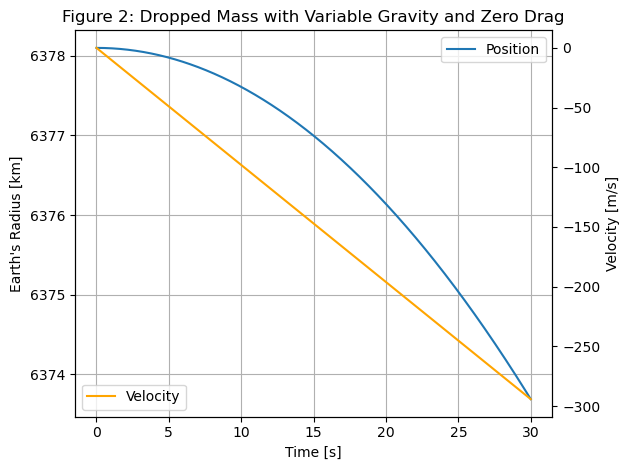

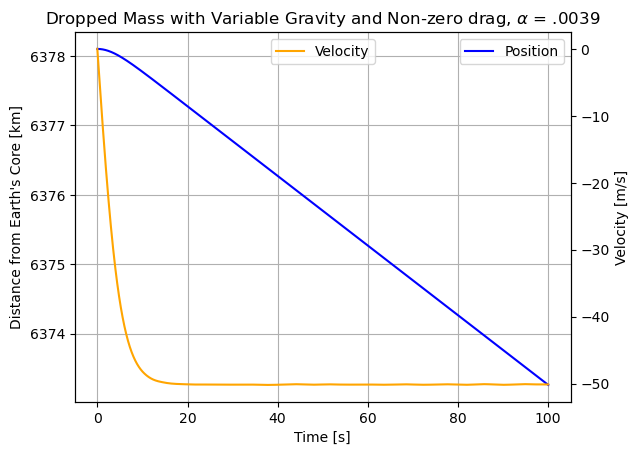

In [4]:
#Part 2
alpha = 0
def ghomogeneous(r): #new variable grav
    return g*r/radiusearth

#EOMs
def derivatives (t,s):
    y,v = s
    dydt = v
    dvdt = -ghomogeneous(y)+alpha*np.abs(v)**gamma
    return [dydt, dvdt]
t0,tf = 0, 30
t_eval = np.linspace(t0,tf,1000)
soln = solve_ivp(fun = derivatives,t_span = (t0,tf),y0 = [radiusearth,0],t_eval = t_eval, events = hitsbottom )
#plots
fig, ax = plt.subplots()
ax.plot(soln.t,soln.y[0]*1e-3,label = "Position")
ax.set_ylabel("Earth's Radius [km]")
ax.set_xlabel("Time [s]")
twin = ax.twinx()
twin.plot(soln.t,soln.y[1], label = "Velocity", color = "orange")
twin.set_ylabel("Velocity [m/s]")
ax.grid()
ax.set_title("Figure 2: Dropped Mass with Variable Gravity and Zero Drag")
ax.legend(loc = "upper right")
twin.legend(loc = "lower left")
fig.tight_layout()
fig.savefig("Figure 2.png")

#change alpha
alpha = .0039
t0,tf = 0,100
t_eval = np.linspace(t0,tf,1000)
soln2 = solve_ivp(fun = derivatives,t_span = (t0,tf),y0 = [radiusearth,0],t_eval = t_eval, events = hitsbottom )

#plots
fig2, ax2 = plt.subplots()
ax2.plot(soln2.t, soln2.y[0]*1e-3, color = "blue", label = "Position")
ax2.set_ylabel("Distance from Earth's Core [km]")
ax2.set_xlabel("Time [s]")
ax2.grid()
ax2.set_title(r"Dropped Mass with Variable Gravity and Non-zero drag, $\alpha$ = .0039")
twin2 = ax2.twinx()
twin2.plot(soln2.t,soln2.y[1], color = "orange", label = "Velocity")
twin2.set_ylabel("Velocity [m/s]")
ax2.legend(loc ="upper right")
twin2.legend(loc = "upper center")

print(f"Variable gravity fall time by: {soln.t_events[0][0]} seconds")
print(f"Variable gravity and drag fall time: {soln2.t_events[0][0]}")
print("""
Incorporating a height dependent gravitational force without drag causes the time the mass hits the bottom to lengthen by 
approximately .0015 seconds. This can be understood from examining the function given for variable gravity. It implies that as the ratio of 
the current radius to the earth's radius decreases, gravity also decreases. This makes sense because at the core gravity should be zero. 
Furthermore, from Newton's second law, we know that if the force decreases the acceleration does as well, leading to a slower time to the bottom
of the shaft""")
print("""
The alpha drag coefficient value was calibrated by making the assumption that the test mass has the same terminal velocity as the skydiver.
This is simple enough and just means to match the final velocity at the final time to be 50 m/s. Another calibration tool was that the skydiver
takes 12 seconds to terminal velocity. I experimented using different values (such as .01, .005, .001 etc.),until I obtained the current alpha 
value of .0039 to match both the 12 second and 50 m/s requirement.""")

The mass hits the wall at 21.907100243497013 seconds.
After adding drag back in, the mass hits the wall at 29.552957867473655 seconds.

Due to the coriolis force, the mass hits the wall before it reaches the bottom. After adding the drag back in we notice that here the 
drag does make a significant difference, the time to hit the wall significantly increases by 8 seconds. 


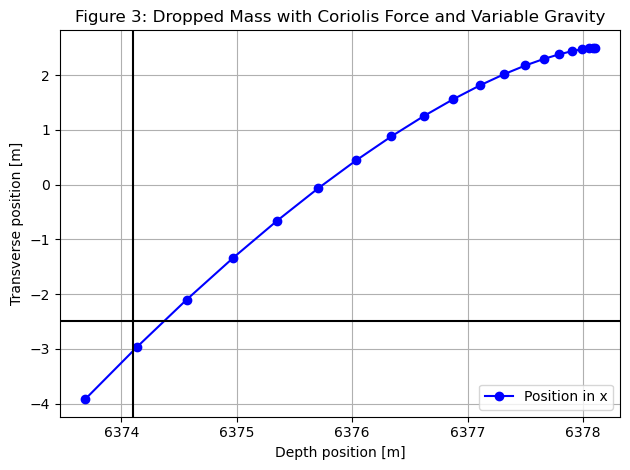

In [5]:
#Part 3
alpha = 0
def derivatives(t,s):
    x,y,vx,vy = s
    ax = 2*earthrotrate*vy
    ay = -(ghomogeneous(y)-alpha*vy**gamma)-2*earthrotrate*vx
    return [vx, vy, ax, ay] #four returns

def hitwall(t, s):
    return s[0]
hitwall.terminal = False
hitwall.direction = -1
t0,tf = 0,30
t_eval = np.linspace(t0,tf,20)
wall = 2.5
y0 = [wall,radiusearth,0,0]
soln = solve_ivp(fun = derivatives, t_span = (t0,tf), y0 = y0, t_eval = t_eval, events = hitwall, rtol = 1e-9)
print(f"The mass hits the wall at {soln.t_events[0][0]} seconds.")

# plots
fig3, ax3 = plt.subplots()
ax3.plot(soln.y[1]*1e-3,soln.y[0], color = "blue", label = "Position in x", marker= "o")
ax3.set_ylabel("Transverse position [m]")
ax3.set_xlabel("Depth position [m]")
ax3.grid()
ax3.legend()
ax3.axhline(y=-2.5, color = "black")
ax3.axvline(x=radiusearth*1e-3-4, color = "black")
ax3.set_title("Figure 3: Dropped Mass with Coriolis Force and Variable Gravity")
fig3.tight_layout()
fig3.savefig("Figure 3.png")
#change alpha
alpha = .0039
soln = solve_ivp(fun = derivatives, t_span = (t0,tf), y0 = y0, t_eval = t_eval, events = hitwall)

print(f"After adding drag back in, the mass hits the wall at {soln.t_events[0][0]} seconds.")
print("""
Due to the coriolis force, the mass hits the wall before it reaches the bottom. After adding the drag back in we notice that here the 
drag does make a significant difference, the time to hit the wall significantly increases by 8 seconds. """)


Time to center of the Earth: 1266.575360875247 seconds
Actual speed at center crossing 7910.067051268107 m/s
Theoretical velocity (speed) for mass in orbit if it is in centripetal balance: 7905.277129890415
This gives a time for the orbital period of 5069.371199675785
The orbital period is 4.002423666423351 times larger than the crossing time


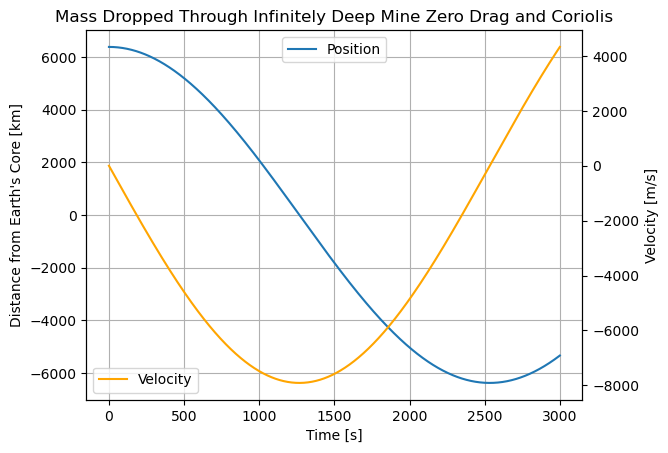

In [6]:
#Part 4
def derivatives (t,s):
    y,v = s
    dydt = v
    dvdt = -ghomogeneous(y)
    return [dydt, dvdt]

def centercross(t, s): #event1
    return s[0]

def otherside(t, s): #event2
    return s[0] + 2*radiusearth

otherside.terminal = False
otherside.direction=-1

t0,tf = 0,3000
t_eval = np.linspace(t0,tf,1000)
soln = solve_ivp(fun = derivatives,t_span = (t0,tf),y0 = [radiusearth,0],t_eval = t_eval, events = [centercross, otherside], rtol = 1e-8)
print(f"Time to center of the Earth: {soln.t_events[0][0]} seconds")
print(f"Actual speed at center crossing {np.abs(soln.y_events[0][0][1])} m/s")
v = np.sqrt(Gnewt*massearth/radiusearth)
print(f"Theoretical velocity (speed) for mass in orbit if it is in centripetal balance: {v}")
orbperiod = 2*np.pi*(radiusearth)/v
print(f"This gives a time for the orbital period of {orbperiod}")
t = soln.t
y = soln.y[0]
v = soln.y[1]


fig,ax = plt.subplots()
ax.plot(t,y*1e-3,label = "Position")
twin =ax.twinx()
twin.plot(t,v, label = "Velocity", color = "orange")
ax.grid()
ax.set_ylabel("Distance from Earth's Core [km]")
ax.set_xlabel("Time [s]")
ax.set_title("Mass Dropped Through Infinitely Deep Mine Zero Drag and Coriolis")
ax.legend(loc = "upper center")
twin.legend(loc = "lower left")
twin.set_ylabel("Velocity [m/s]")
print(f"The orbital period is {orbperiod/soln.t_events[0][0]} times larger than the crossing time")
#remember to put at what time it reaches radius earth again and when it crosses over

Time to reach center for n=0: 1267.3427996212383 [s]. Speed at center:7905.277114448316 [m/s]
Time to reach center for n=1: 1096.512985261829 [s]. Speed at center:10457.698647710951 [m/s]
Time to reach center for n=2: 1035.075646309803 [s]. Speed at center:12182.850249245026 [m/s]
Time to reach center for n=9: 943.7775309879296 [s]. Speed at center:18370.673737782512 [m/s]


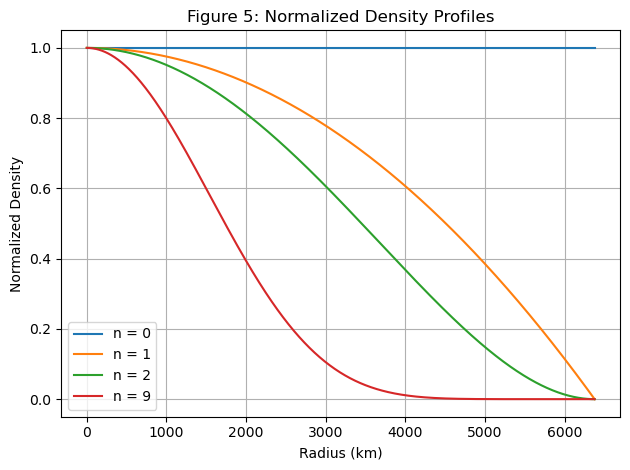

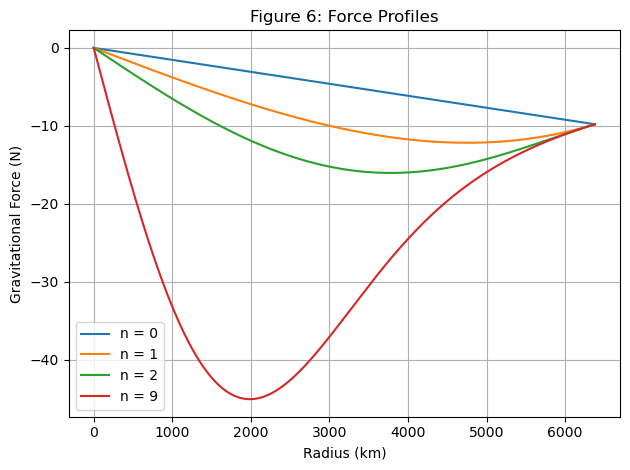

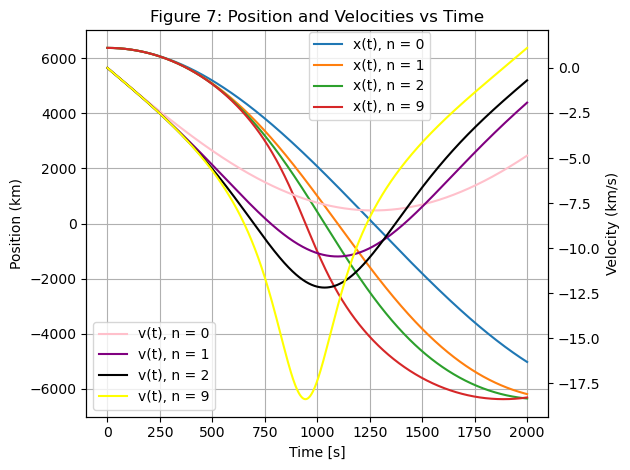

In [7]:
#Part 5
n_vals = [0, 1, 2, 9]
r_vals = np.linspace(1e-6, radiusearth, 1000)

#density
def density(r, n, p_n):
    return p_n * (1-(r**2/radiusearth**2))**n

#Solve for pn values by dividing mass/integrated result
def calcpn(n):
    integrand = lambda r: 4 * np.pi * r**2 * (1 - r**2 /radiusearth**2)**n #can use lambda to neatly defn multivariable integrand
    integral, err = quad(integrand, 0, radiusearth)
    return massearth/integral

#subtlety that you can only work within the particular enclosed mass
def mass(r, n, p_n):
    integrand = lambda rcurr: 4 * np.pi * rcurr**2 * density(rcurr, n, p_n)
    result, err = quad(integrand, 0, r)
    return result

#Now we can compute the forces
def grav_force(r, n, p_n):
    if r == 0:
        return 0
    calcmass = mass(r, n, p_n)
    return -Gnewt * calcmass / r**2

#solve ode for x(t), v(t)
def derivatives(t, s, n, p_n):
    y, v = s
    dydt = v
    dvdt = grav_force(y, n, p_n)
    return [dydt, dvdt]
#densities with pn=1
fig5, ax5 = plt.subplots()
for n in n_vals:
    densities = density(r_vals, n, 1)  # p_n = 1 for normalized plot
    plt.plot(r_vals*1e-3, densities, label=f"n = {n}")
ax5.set_xlabel("Radius (km)")
ax5.set_ylabel("Normalized Density")
ax5.set_title("Figure 5: Normalized Density Profiles")
ax5.legend()
ax5.grid()
fig5.tight_layout()
fig5.savefig("Figure 5.png")

# force
fig6, ax6 = plt.subplots()
for n in n_vals:
    p_n = calcpn(n)
    force_vals = np.array([grav_force(r, n, p_n) for r in r_vals])
    ax6.plot(r_vals*1e-3, force_vals, label=f"n = {n}")
ax6.set_xlabel("Radius (km)")
ax6.set_ylabel("Gravitational Force (N)")
ax6.set_title("Figure 6: Force Profiles")
ax6.legend()
ax6.grid()
fig6.tight_layout()
fig6.savefig("Figure 6.png")

# solve ivp for EOM
t0, tf = 0, 2000
t_eval = np.linspace(t0, tf, 1000)
y0 = [radiusearth, 0]  # starting at surface, zero initial velocity

def center(t, s, n, p_n):
    return s[0]
center.terminal = False
center.direction = -1

fig7, ax7 = plt.subplots()
colorscount = 0 #increment color
colors = ["pink", "purple", "black", "yellow"]
twin = ax7.twinx()
for n in n_vals:
    p_n = calcpn(n)
    soln = solve_ivp(derivatives, (t0, tf), y0, t_eval=t_eval, args=(n, p_n), rtol=1e-8, events = center)
    print(f"Time to reach center for n={n}: {soln.t_events[0][0]} [s]. Speed at center:{np.abs(soln.y_events[0][0][1])} [m/s]")
    y = soln.y[0]
    v = soln.y[1]
    t = soln.t
    ax7.plot(t, y*1e-3, label=f"x(t), n = {n}")
    twin.plot(t, v*1e-3, label=f"v(t), n = {n}", color = colors[colorscount])
    colorscount = colorscount+1
ax7.set_ylabel("Position (km)")
ax7.set_xlabel("Time [s]")
ax7.set_title("Figure 7: Position and Velocities vs Time") 
ax7.grid(True)
ax7.legend(bbox_to_anchor=(.76, .75), loc="lower right")
twin.set_ylabel("Velocity (km/s)")
twin.legend()
fig7.tight_layout()
fig7.savefig("Figure 7.png")

In [8]:
# Part 6
#First we need to compute gravitational acceleration on the surface of the moon by solving F = GMm/r^2
gmoon = Gnewt*massmoon/radiusmoon**2
print(f"Gravity on the moon: {gmoon}")
#EOM
def derivatives(t, s):
    y,v = s
    dydt = v
    dvdt = -gmoon*y/radiusmoon # we are assuming p = M/V but not that g doesn't change as a function of radius, this is SHM
    return [dydt, dvdt]

def centermoon(t, s):
    return s[0]

center.terminal = False
center.direction = -1
t0, tf = 0, 4000
t_eval = np.linspace(t0, tf, 1000)
y0 = [radiusmoon, 0]
soln = solve_ivp(derivatives, t_span = (t0, tf), y0 = y0, t_eval = t_eval, events = centermoon)
mooncentertime = soln.t_events[0][0]
print(f"Time to reach center of the Moon: {mooncentertime} [s]")

#Compute moon density 
p = massmoon/((4/3)*np.pi*radiusmoon**3)
print(f"Density of the moon: {p} kg/m^3")
#Compute earth density
pearth = massearth/((4/3)*np.pi*radiusearth**3)
print(f"Density of the earth: {pearth} kg/m^3")
earthtime = 1266.575360875247
print(f"Ratio of time to reach center of the earth to the time to the center of the moon {earthtime/mooncentertime}")
ratio = p/pearth
print(f"Ratio of the densities of the earth to the density of the moon {ratio}")
print(f"Square root of the ratio of densities: {np.sqrt(ratio)}")
print("""
This demonstrates an inversely proportional relationship between the fall time to the square root of the density. For our case, this is best
expressed as the ratio below. This result is easily derived from using variable gravity and constant density to form simple harmonic motion 
through the center of a massive body. It will be clear that T is proportional to 1/squareroot(rho).
""")

Gravity on the moon: 1.6238411532695385
Time to reach center of the Moon: 1624.9059919736462 [s]
Density of the moon: 3341.7538038703183 kg/m^3
Density of the earth: 5494.867409551201 kg/m^3
Ratio of time to reach center of the earth to the time to the center of the moon 0.77947608485143
Ratio of the densities of the earth to the density of the moon 0.6081591337511927
Square root of the ratio of densities: 0.7798455832735046

This demonstrates an inversely proportional relationship between the fall time to the square root of the density. For our case, this is best
expressed as the ratio below. This result is easily derived from using variable gravity and constant density to form simple harmonic motion 
through the center of a massive body. It will be clear that T is proportional to 1/squareroot(rho).

